In [2]:
import os
import torch
from fastai import *
from fastai.basics import *
from fastai.vision import *
from fastai.vision.data import *
from fastai.metrics import error_rate, accuracy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image

import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
INPUT =Path('./')
os.listdir(INPUT)

['digit_recognizer.ipynb', 'test', 'test.csv', 'train', 'train.csv']

In [5]:
train_df = pd.read_csv(INPUT/'train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df = pd.read_csv(INPUT/'test.csv')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
TRAIN = Path('./train')
TEST = Path('./test')

In [8]:
for i in range(10):
    try:
        os.makedirs(TRAIN/str(i))
    except:
        print('Folder already exists')
sorted(os.listdir(TRAIN))

Folder already exists
Folder already exists
Folder already exists
Folder already exists
Folder already exists
Folder already exists
Folder already exists
Folder already exists
Folder already exists
Folder already exists


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
try:
    os.makedirs(TEST)
except:
    print('Folder already exists')


Folder already exists


In [10]:
os.listdir(TEST)

['0.jpg',
 '1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg'

In [11]:
if os.path.isdir(TRAIN):
    print('Train directory has been created')
else:
    print('Train directory creation failed.')

if os.path.isdir(TEST):
    print('Test directory has been created')
else:
    print('Test directory creation failed.')

Train directory has been created
Test directory has been created


Convert pixels to Image

In [12]:
def pixexl_to_image(pix_data, filepath):
    img_mat= pix_data.reshape(28,28)
    img_mat = img_mat.astype(np.uint8())

    img_data = Image.fromarray(img_mat)
    img_data.save(filepath)


In [13]:
for idx, data  in train_df.iterrows():
    label , data = data[0], data[1:]
    folder = TRAIN/str(label)
    fname = f"{idx}.jpg"
    filepath = folder/fname
    image_data = data.values
    pixexl_to_image(image_data, filepath)
    

In [14]:
for idx, data in test_df.iterrows():
    
    folder = TEST
    
    fname = f"{idx}.jpg"
    filepath = folder/fname
    
    img_data = data.values
    
    pixexl_to_image(img_data,filepath)

In [15]:
def plotTrainImage():
    
    fig = plt.figure(figsize= (5,10))
    
    for rowIdx in range(1,10):
        
        foldNum = str(rowIdx)
        path = TRAIN/foldNum
        
        images = os.listdir(path)
        
        for sampleIdx in range(1,6):
            
            randNum = random.randint(0, len(images)-1)
            image = Image.open(path/images[randNum])
            ax = fig.add_subplot(10, 5, 5*rowIdx + sampleIdx)
            ax.axis("off")
            
            plt.imshow(image, cmap='gray')
            
    plt.show()   

In [16]:
def plotTestImage():
    
    fig = plt.figure(figsize=(5, 10))    
    paths = os.listdir(TEST)    
        
    for i in range(1, 51):
        randomNumber = random.randint(0, len(paths)-1)
        image = Image.open(TEST/paths[randomNumber])
        
        ax = fig.add_subplot(10, 5, i)
        ax.axis("off")
        
        plt.imshow(image, cmap='gray')
    plt.show()

In [17]:
bs= 1024
path = Path('./train')
test = Path('./test')


In [18]:
%pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Note: you may need to restart the kernel to use updated packages.


In [19]:
#import ImageDataLoader from fastai
from fastai.vision.all import *
data = ImageDataLoaders.from_folder(path, valid_pct=0.1, bs=bs)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


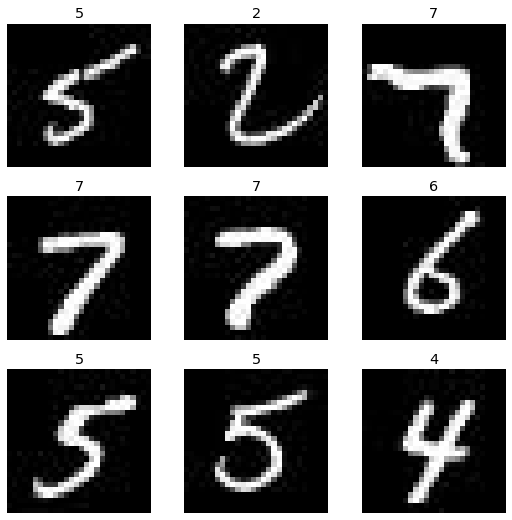

In [20]:
data.show_batch()

Model

In [22]:
learn = cnn_learner(data, models.resnet18,model_dir='./models', metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\rohit/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [23]:
learn.summary()

Sequential (Input shape: 1024 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     1024 x 64 x 14 x 14 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     1024 x 64 x 7 x 7   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

SuggestedLRs(valley=0.0006918309954926372)

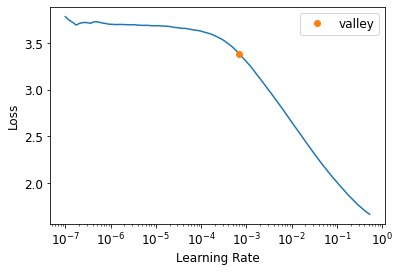

In [24]:
learn.lr_find()

In [25]:
learn.fit_one_cycle(10,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.136634,1.001982,0.677381,02:32
1,1.114531,0.303149,0.907857,02:29
2,0.609728,0.166167,0.948571,02:29
3,0.359235,0.124093,0.962619,02:28
4,0.224151,0.109341,0.967381,02:27
5,0.149497,0.100206,0.973571,02:28
6,0.106854,0.097192,0.971429,02:28
7,0.079762,0.093415,0.973810,02:38
8,0.064428,0.092187,0.974524,02:32
9,0.055997,0.091982,0.974048,02:30


In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(5,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.094257,0.836514,0.935476,07:57
1,0.072300,0.101815,0.974048,07:53
2,0.051169,0.045990,0.987857,08:00
3,0.033471,0.027453,0.993333,08:05
4,0.020553,0.020169,0.995000,08:05


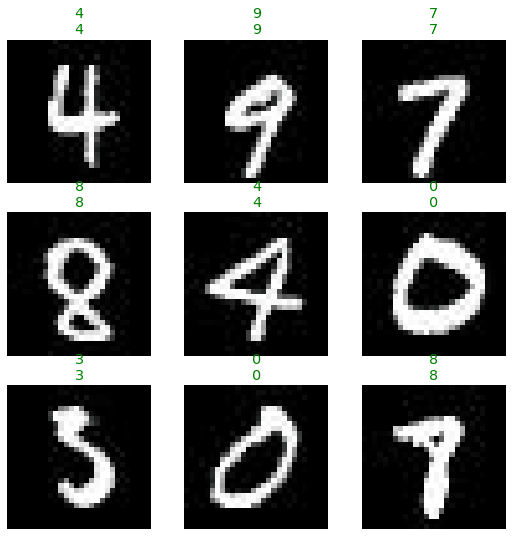

In [28]:
learn.show_results()

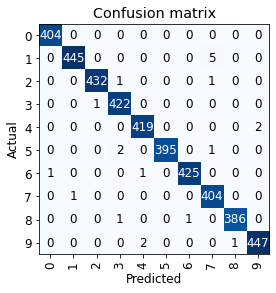

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [31]:
test = list(Path(r'./test').glob('**/*'))
test_dl = data.test_dl(test)

In [32]:
preds = learn.get_preds(dl= test_dl, with_decoded=True)
preds = preds[2].tolist()

In [33]:
ids = [int(img.stem)+1 for img in test]
submission = pd.DataFrame(ids, columns=['ImageId'])
submission['Label'] = preds
submission

,ImageId,Label
0,1,2
1,2,0
2,11,5
3,101,0
4,1001,0
...,...,...
27995,9996,1
27996,9997,9
27997,9998,2
27998,9999,7


In [34]:
submission.to_csv('submission.csv', index=False)